# Feature Preprocessing

In [21]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler

------------

## Categorical Features

In [22]:
df = pd.read_csv('../data/weight-height.csv')

df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [23]:
df['Gender'].unique() # it tells me all the unique values in the 'Gender'.

array(['Male', 'Female'], dtype=object)

In [24]:
# this function creates a new data frame with as many columns as the unique
# values in the columns, each column has 0 or 1.

pd.get_dummies(df['Gender'], prefix = 'Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


---------

## Feature Transformations

### 1. Rescale with fixed factor

In [25]:
df['Height (feet)']    = df['Height'] / 12.0 # heights in feet.

df['Weight (100 lbs)'] = df['Weight'] / 100.0 # scales the weight for pounds.

In [26]:
df['Height (feet)']

0       6.153918
1       5.731825
2       6.175842
3       5.977582
4       5.823483
          ...   
9995    5.514388
9996    5.588930
9997    5.322333
9998    5.752854
9999    5.162020
Name: Height (feet), Length: 10000, dtype: float64

In [27]:
df['Weight (100 lbs)']

0       2.418936
1       1.623105
2       2.127409
3       2.200425
4       2.063498
          ...   
9995    1.367775
9996    1.708679
9997    1.284753
9998    1.638525
9999    1.136491
Name: Weight (100 lbs), Length: 10000, dtype: float64

In [28]:
df.describe()

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,66.367560,161.440357,5.530630,1.614404
std,3.847528,32.108439,0.320627,0.321084
min,54.263133,64.700127,4.521928,0.647001
25%,63.505620,135.818051,5.292135,1.358181
50%,66.318070,161.212928,5.526506,1.612129
75%,69.174262,187.169525,5.764522,1.871695
max,78.998742,269.989699,6.583229,2.699897


In [29]:
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


### 2. Min - Max normalization

In [30]:
# if we do this the min max scaler has rescaled our features to be exactly between 0 and 1.

mms = MinMaxScaler()

df['Weight_mms'] = mms.fit_transform(df[['Weight']])

df['Height_mms'] = mms.fit_transform(df[['Height']])

df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


### 3. Standart normalization

In [31]:
# it scales the data so that the mean of the data is zero.
# and the standart deviation is 1.

ss = StandardScaler()

df['Weight_ss'] = ss.fit_transform(df[['Weight']])

df['Height_ss'] = ss.fit_transform(df[['Height']])

df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,-0.00,-0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


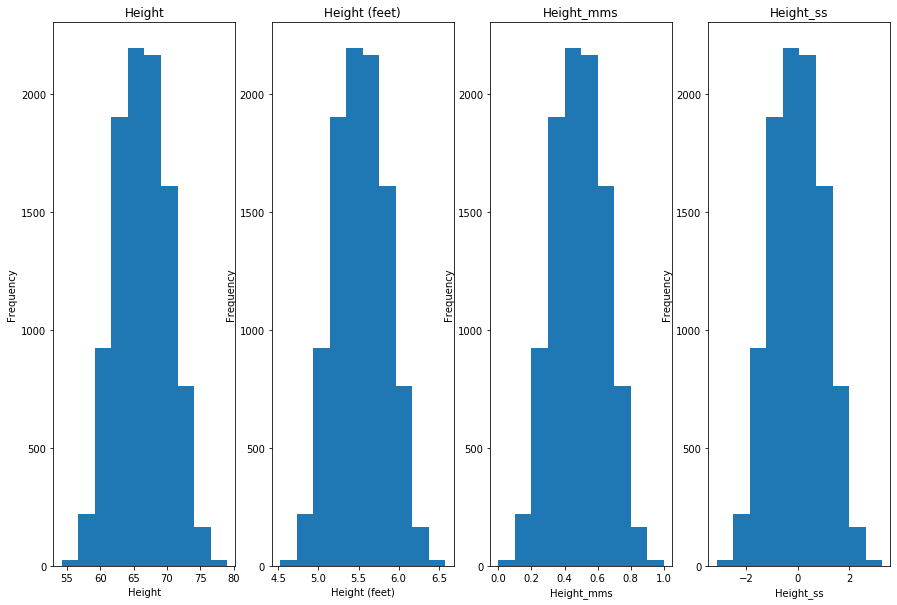

In [32]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

-------------